### siec komputerowa o N wezlach i topologii
- liniowej
- pierscieniowej
- karty - kazdy wezel komunikuje sie z kazdym.
Trasy wyznaczone najkrotsza sciezka (krawedzie nie maja wag)
wyznacz:
- srednia dlugosc trasy 
- srednie opoznienie kazdego lacza (krawedzi)
  -  $T_L  = \frac{1}{(F + 1) - f_L}$
-  $T_L$ - opoznienie lacza L
- L - numer lacza (krawedzi)
- F - liczba wszystkich transmisji (wybranych najkrotszych sciezek)
- $f_L$ - liczba transmisji dla ktorych trasa wykorzystuje lacze L



In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from utils import create_edges
from itertools import combinations

In [8]:
N =   9# must be a power of some number
nodes = [chr(i) for i in range(65, 65 + N)]


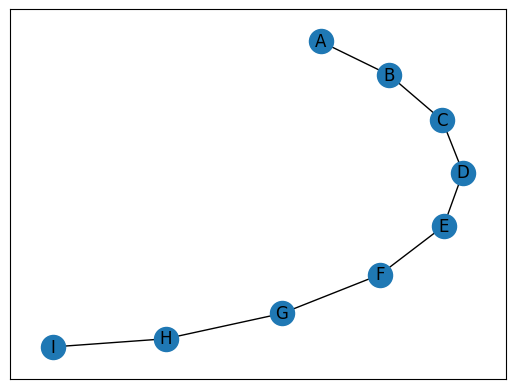

In [9]:
G = nx.Graph(nodes = nodes)
edges = []
for i in range(len(nodes) - 1):
            edges.append((nodes[i], nodes[i + 1]))
G.add_edges_from(edges)
nx.draw_networkx(G, with_labels=True)

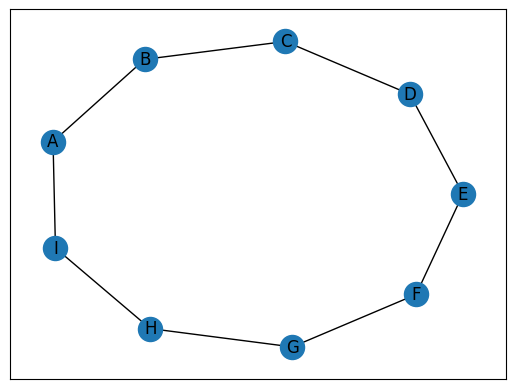

In [10]:
G2 = nx.cycle_graph(nodes)
nx.draw_networkx(G2, with_labels=True)

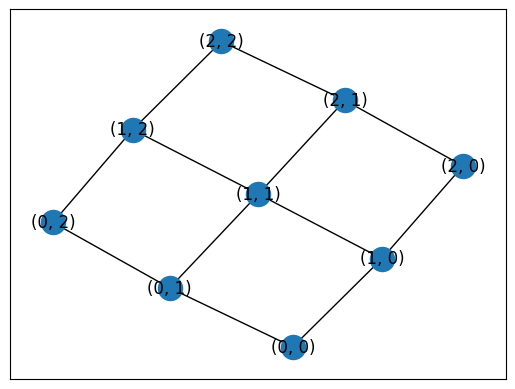

In [11]:
G3 = nx.grid_2d_graph(int(np.sqrt(N)), int(np.sqrt(N)))
nx.draw_networkx(G3, with_labels=True)
nodes = list(G3.nodes())

In [12]:
def create_paths(G):
    pairs = list(combinations(G.nodes(), 2))
    paths = []
    for pair in pairs:
        path = nx.shortest_path(G, pair[0], pair[1])
        for i in range(len(path) - 1):
            paths.append((path[i], path[i + 1]))
    return paths
print(len(create_paths(G)))
print(len(create_paths(G2)))
print(len(create_paths(G3)))

120
90
72


In [13]:

def delay(G):
    paths = create_paths(G)
    F = N*(N-1)//2   
    delays = [] 
    for edge in list(G.edges):
        f = paths.count(edge)
        delays.append(1/((F+1)-f))
    
    return np.mean(delays)


In [14]:
for graph, name in zip([G, G2, G3], ['linear', 'cycle', 'grid']):
    print(f"average shortest path length in {name}: {nx.average_shortest_path_length(graph):.2f}")
    print(f"average delay in {name}: {delay(graph):.5f}")
    

average shortest path length in linear: 3.33
average delay in linear: 0.04735
average shortest path length in cycle: 2.50
average delay in cycle: 0.03442
average shortest path length in grid: 2.00
average delay in grid: 0.03133


## jak szybko rozprzestrzenia sie plotka
### zalozenia:
- losowa struktura spolecznosci
- K % pelnosci grafu (ok 30)
- w kazdej iteracji osoba rozprzestrzenai plotke wszystkim sasiadom

In [15]:
import networkx as nx
from itertools import combinations
def create_random_edges(G, k):
    """
    Creates edges between nodes in a graph based on the type of connection
    G: networkx graph
    k: int probability of creating an edge
    """
    pairs = list(combinations(G.nodes(), 2))
    edges = []
    nodes = list(G.nodes())
    for pair in pairs:
        if np.random.random() <= k:
            edges.append(pair)
    G.remove_edges_from(G.edges)
    G.add_edges_from(edges)
    
    return G


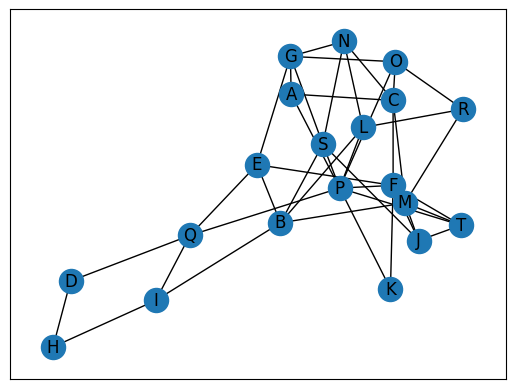

In [88]:
N =   20# must be a power of some number
nodes = [chr(i) for i in range(65, 65 + N)]
G = nx.path_graph(nodes)
G = create_random_edges(G, 0.2)
nx.draw_networkx(G, with_labels=True)

In [89]:
infected_nodes = list(np.random.choice(G.nodes(), 1))
print(infected_nodes) 

['T']


In [90]:
def spread(G, infected_nodes):
    """
    G: networkx graph
    infected_nodes: list of nodes
    k: probability of infecting a node
    """
    new_infected_nodes = []
    for node in infected_nodes:
        neighbors = list(G.neighbors(node))
        for node in G.nodes:
            if node in neighbors:
                new_infected_nodes.append(node)
    print(new_infected_nodes)
    return list(set(infected_nodes + new_infected_nodes))


['F', 'J', 'M', 'P']


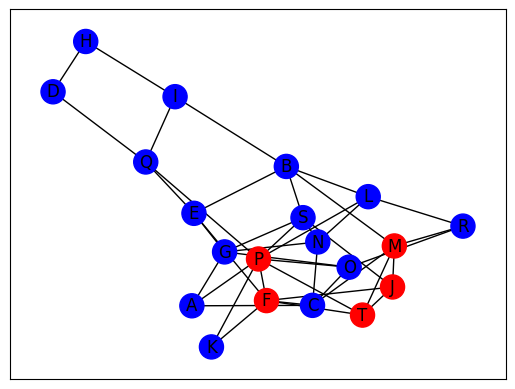

['T', 'P', 'F', 'M', 'J']
['F', 'J', 'M', 'P', 'A', 'F', 'K', 'L', 'O', 'Q', 'S', 'T', 'C', 'E', 'J', 'K', 'P', 'T', 'B', 'C', 'J', 'R', 'T', 'F', 'M', 'S', 'T']


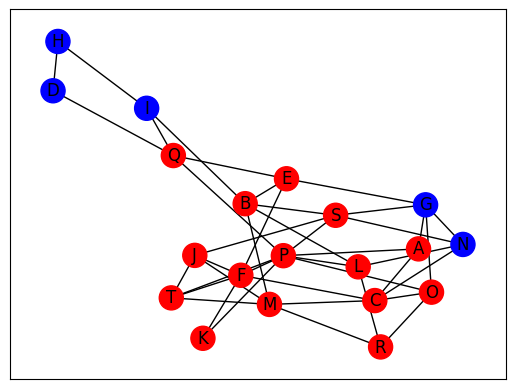

['E', 'C', 'T', 'L', 'F', 'P', 'S', 'A', 'K', 'M', 'O', 'B', 'J', 'R', 'Q']
['B', 'F', 'G', 'Q', 'A', 'F', 'M', 'N', 'O', 'F', 'J', 'M', 'P', 'B', 'N', 'P', 'R', 'C', 'E', 'J', 'K', 'P', 'T', 'A', 'F', 'K', 'L', 'O', 'Q', 'S', 'T', 'B', 'G', 'J', 'N', 'P', 'C', 'G', 'P', 'F', 'P', 'B', 'C', 'J', 'R', 'T', 'C', 'G', 'P', 'R', 'E', 'I', 'L', 'M', 'S', 'F', 'M', 'S', 'T', 'L', 'M', 'O', 'D', 'E', 'I', 'P']


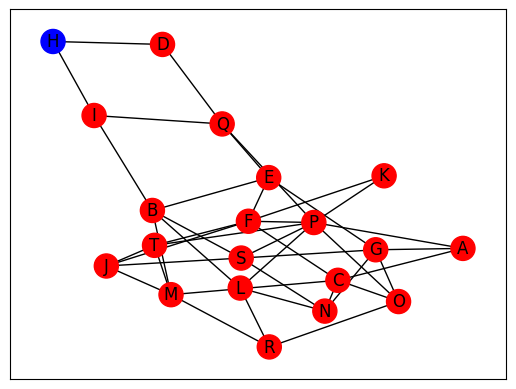

['L', 'K', 'N', 'C', 'F', 'M', 'R', 'J', 'Q', 'E', 'S', 'I', 'D', 'O', 'B', 'T', 'P', 'A', 'G']
['B', 'N', 'P', 'R', 'F', 'P', 'C', 'G', 'L', 'S', 'A', 'F', 'M', 'N', 'O', 'C', 'E', 'J', 'K', 'P', 'T', 'B', 'C', 'J', 'R', 'T', 'L', 'M', 'O', 'F', 'M', 'S', 'T', 'D', 'E', 'I', 'P', 'B', 'F', 'G', 'Q', 'B', 'G', 'J', 'N', 'P', 'B', 'H', 'Q', 'H', 'Q', 'C', 'G', 'P', 'R', 'E', 'I', 'L', 'M', 'S', 'F', 'J', 'M', 'P', 'A', 'F', 'K', 'L', 'O', 'Q', 'S', 'T', 'C', 'G', 'P', 'A', 'E', 'N', 'O', 'S']


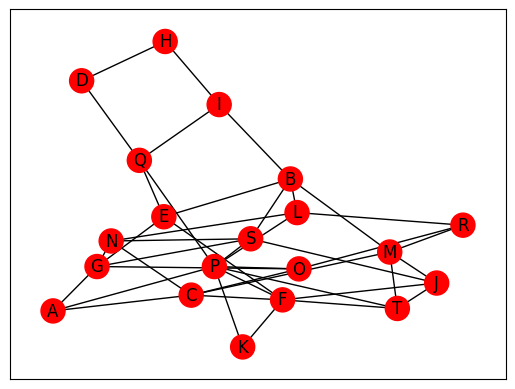

['L', 'K', 'N', 'C', 'F', 'M', 'R', 'J', 'Q', 'E', 'S', 'I', 'D', 'O', 'B', 'T', 'P', 'H', 'A', 'G']


In [91]:
while len(infected_nodes) < len(G.nodes):
    infected_nodes = spread(G, infected_nodes)
    nx.draw_networkx(G, with_labels=True, node_color=['red' if node in infected_nodes else 'blue' for node in G.nodes])
    plt.show()
    print(infected_nodes)
